# Code Groupe : GRP6730RV

# Topic
Assume that you are employed to help a credit card company to detect potential fraud cases
so that the customers are ensured that they won’t be charged for the items they did not
purchase. You are given a dataset containing the transactions between people, the
information that they are fraud or not, and you are asked to differentiate between them.
The dataset (named : creditcard.csv) contain 31 variables and the last one is in the range of 0
and 1 ; we have 284 807 observations.
You are asked to build a classification models using : SVM, Random forest and the Neural
network, to classify and distinguish fraud transactions.

### Table of Contents
* [Introduction](#int)
* [Analyse descriptive des donnees](#part1)
    * [visualisation de la table de donnee](#table)
    * [Recherches des donnees manquantes](#na)
    * [description des variables](#description)
        * [Proportion des o et 1 dans la variable class](#prop)
    * [Standarisation des variables](#sta)
    * [Normalisation des variables](#nor)
    * [techniques de Undersampling](#und)
* [Le choix de la metric ( Recall)](#met)
* [Decoupage en donnee d'entrainement et Variable centre reduit](#part2)
    * [Proportion des o et 1 dans le training set et test set](#prop1)
* [Le Modele SVM](#svm)
* [Le Modele Random Forest](#rf)
* [Réseau de neurones artificiels](#ANN)

## 1-  Introduction <a class="anchor" id="int"></a>

Dans cette étude nous avons étudié trois modèles à savoir la méthode de SVM, la méthode de Random Forest et les Réseaux de Neurones.
$\textbf{L'Objective principal est de construire des modeles qui predisent le mieux les fraudeurs}$.

Nous avons utilisé quatre techniques sur les données d’entraînement pour chaque modèle dont :
> * Les données Normalisées
> * Les données Standardisées
> * Les données réchantillonnées par OverSample
> * Les données rechatillonnées par UnderSample

La meilleure performance est obtenue avec le méthode de Random Forest sur les données rechantillonées par UnderSample , suivi des données normalisees.\
Les Autre techniques donnent de bonnes performance avec les réseaux de Neurones

In [3]:

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Data import

# 2- Analyse  des donnees <a class="anchor" id="part1"></a>

###  2.1 - Get the data

In [1]:
import pandas as pd
df = pd.read_csv('/home/yacouba/Bureau/Yacouba/machine_learnig/creditcard.csv') ## Importation de la donnee

### visualisation de la table de donnee <a class="anchor" id="table"></a>

In [6]:
df.head(10) # Data visualization

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df.shape  ## Data Dimension

(284807, 31)

> We have a database containing $288\ 4807$ observations and 31 variables. 

### 2.2 - Recherche de valeurs  manquantes <a class="anchor" id="na"></a>

In [8]:
df.isnull().sum().sum() 

0

> Notre base de donnée ne contient aucune valeur manquante

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

> * On remarque que nos variables sont tous de type réel

###### 

### 2.3- Description des variables <a class="anchor" id="description"></a>

In [10]:
df.describe().T ## Variables  description

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


> * La tables des descriptions de nos variables montrent que plus de $75\%$ de nos variables sont de la classe 0 ce qui parait normal du point de vu que ce sont les clients non fraudeurs. 
> * De facon générale, la moyenne des variables est très faibles à l'exception des variables $Amont$ et $time$

Saving figure attribute_histogram_plots


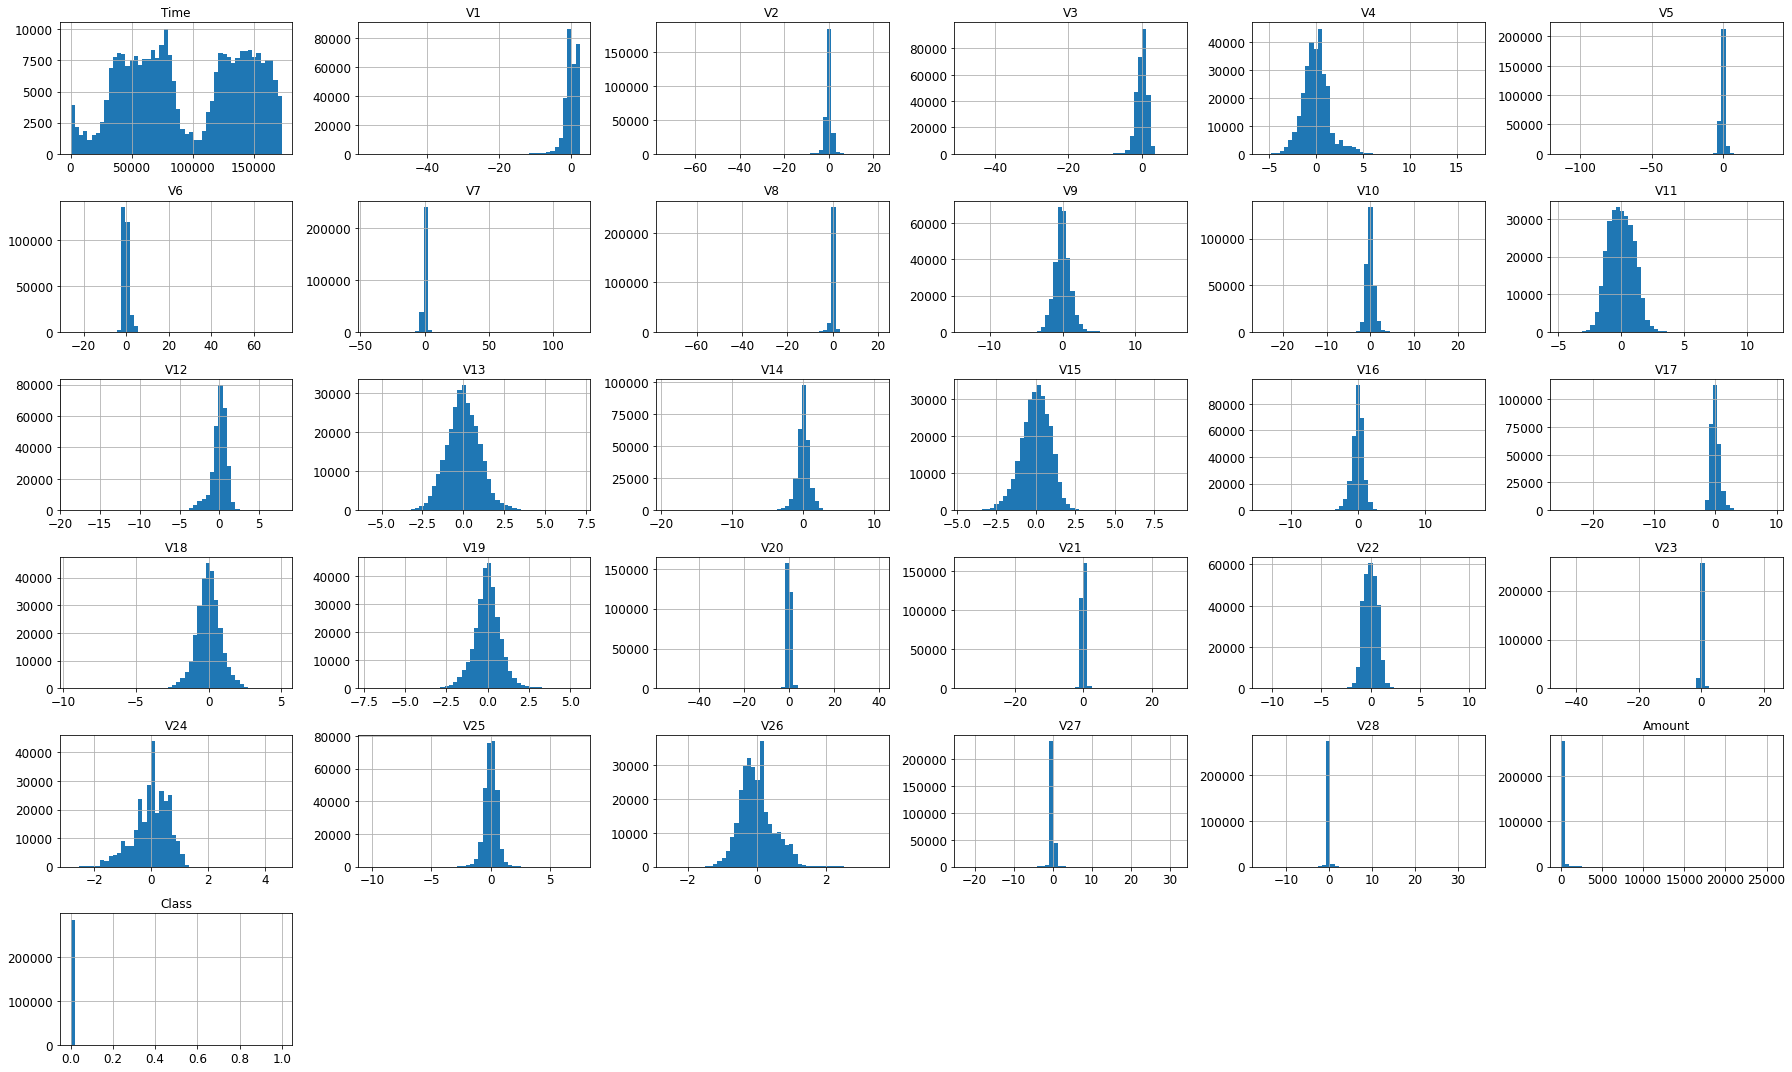

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,15))
save_fig("attribute_histogram_plots")
plt.show()

> Ce graphique nous permet de visualiser la distribution de chaque variables.\
> On observe que les individus de la classe 0 sont très inferieurs en nombre par rapport aux individus de la classe 0

In [12]:
d0=df[ df['Class'] == 0 ].describe().T # on recupere les observation qui sont de la class 0
d1=df[ df['Class'] == 1 ].describe().T # on recupere les observation qui sont de la class 1


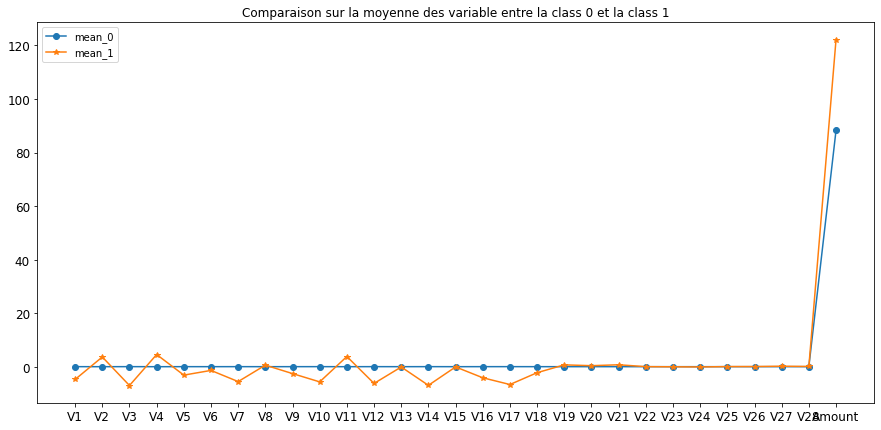

In [13]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15,7))
plt.plot(d0['mean'].iloc[1:30], label='mean_0', marker='o')
plt.plot(d1['mean'].iloc[1:30], label='mean_1',marker='*')
plt.legend()
plt.title("Comparaison sur la moyenne des variable entre la class 0 et la class 1")
plt.show()

> * On constat que tous les clients de la class 0 (Client non fraudeur) ont une moyenne très proche de zer0 sur les variables V_i 0<i<29. 
> * Les moyennes des variables de la class 1 varient faiblement autour de celles de la class 0
> * Les varriables de la class 1 sont différents pour chaques variables
> * On constate que la variable $\textbf{Amount}$ a une moyenne plus grande pour les individus de la $\textbf{class 1}$ que les individus de la $\textbf{class 0}$

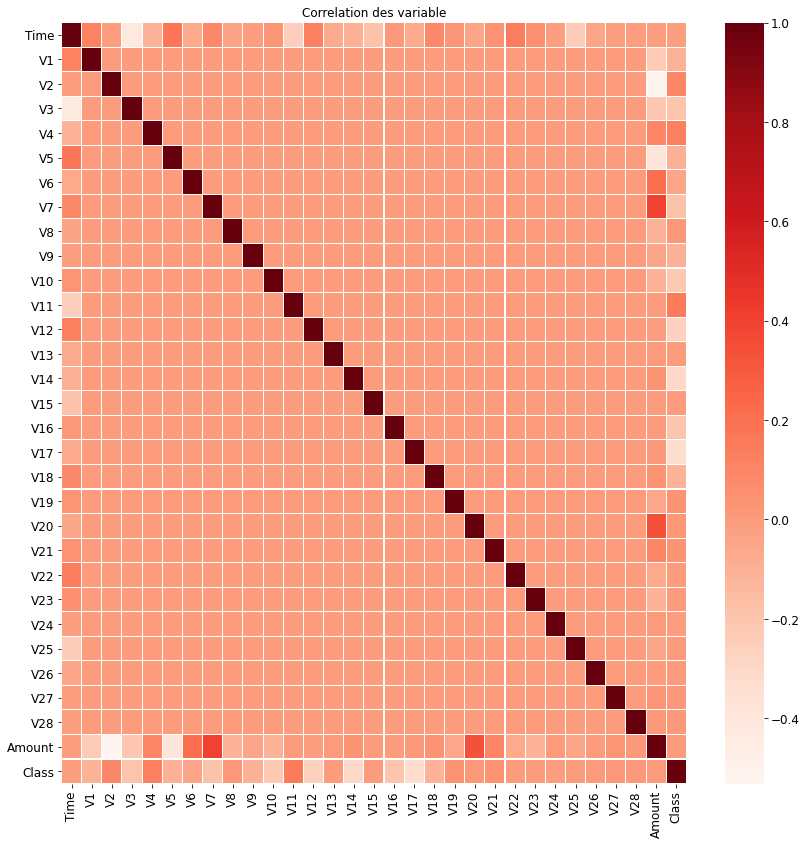

In [43]:
import seaborn as sns
plt.figure(figsize = (14,14))
plt.title('Correlation des variable')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()


### 2.4- Proportion des $0$ et $1$ dans la variable class <a class="anchor" id="prop"></a>

In [2]:
# Pourcentage de chaque classe
from collections import Counter
target = df.values[:,-1]   # on recupere la derniere colonne
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


> Dans cette partie nous verifions $la$ $proportion$ des modalités ($0$ ou $1$) de notre variable dependante
> * Notre base de donnees contient exactement $284 \ 315$ observations de la class $0$ soit une proportion de $99,817\%$. 
> *  Notre base de donnees contient exactement $492$ observations de la class 1 soit une proportion de $0.173\%$. Une proportion très faible de fraudeurs


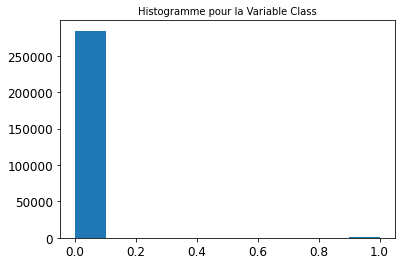

In [16]:
plt.hist(df.values[:,-1])
plt.title('Histogramme pour la Variable Class', fontsize=10)
plt.show()

### 2.5- Decoupage en donnee d'entrainement et Feature Scaling <a class="anchor" id="part2"></a>

> Ici Nous n'avons pas de problèmes d'$\textbf{encodage}$, car nous n'avons que des variables continues. cependant nous pouvons $\textbf{centrer- reduire}$ nos variables pour les mettre sur une même plage. En effet les variables $\textbf{Time}$ et $\textbf{Amount}$ présentent de très grandes valeurs par rapport aux autres variables, d'ou la nécéssiter de centrer et reduire nos variables.

> Apartir de la fonction $\textbf{train_test_split}$ de  $\textbf{sklearn.model_selection}$ nous avons nos données d'entrainement et nos données test

## 2.6- Standarisation des variables <a class="anchor" id="sta"></a>

> * Dans cette partie nous avons standarisé nos variables et normalisé nos variables pour voir lequels des deux methods produirait moins de bias dans la prediction
> * Standardiser les fonctionnalités en supprimant la moyenne et en mettant à l'échelle la variance unitaire

In [3]:
from sklearn.preprocessing import StandardScaler
x= pd.DataFrame(StandardScaler().fit_transform(df.drop(['Class'], axis=1)))
y=df['Class']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## 2.7- Normalisation des variables <a class="anchor" id="nor"></a>

> * La normalisation met à l'échelle et traduit chaque caractéristique individuellement de telle sorte qu'elle se trouve dans la plage donnée sur l'ensemble d'apprentissage, Ici, nous prenons par defaut entre 0 et 1

In [5]:
from sklearn.preprocessing import MinMaxScaler
x_minM= pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['Class'], axis=1)))
y_minM=df['Class']

In [6]:
from sklearn.model_selection import train_test_split
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(x_minM, y_minM, test_size = 0.2, random_state = 6)

### 2.8- Proportion des o et 1 dans le training set et test set<a class="anchor" id="prop1"></a>

In [9]:
# Pourcentage de chaque classe
from collections import Counter
target = y_test_N.values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=0, Count=56864, Percentage=99.83%
Class=1, Count=98, Percentage=0.17%


In [10]:
# Pourcentage de chaque classe
from collections import Counter
target = y_train_N.values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=0, Count=227451, Percentage=99.83%
Class=1, Count=394, Percentage=0.17%


> En faisant varier la valeur de $\textbf{random_state}$ à $6$ dans la fonction $\textbf{train_test_split}$, on obtient une bonne proportion des modalités de la variable class ($0$ et $1$)  dans les données d'entrainement et les données test.
> *  Dans la base de donnée total on a $492$ individus de la class 1 
> * Dans le training set on a $394$ individus de la class 1 soit $80\%$ de $492$
> * Dans le test set on a $98$ individus de la class 1 soit  $20\%$ de $492$

##  2.9 - techniques de Undersampling <a class="anchor" id="und"></a>

L'objective dans cette partie est d'équilibrer le nombre de fraudeurs au nombre de non Fraudeurs pour obtenir un nombre égale dans chaque classe sur les données d'entrainement afin de maximiser les chances d'obtenir un bon modèle de prediction de fraudeurs.


In [11]:
## Target class distribution
import numpy as np

class_val = df['Class'].value_counts()
non_fraud = class_val[0]
fraud = class_val[1]


nonfraud_id = df[df.Class == 0].index
fraud_id = np.array(df[df['Class'] == 1].index)

ran_id = np.random.choice(nonfraud_id, fraud, replace=False)
ran_id = np.array(ran_id)

nonfraud_id = df[df.Class == 0].index
fraud_id = np.array(df[df['Class'] == 1].index)
ran_id = np.random.choice(nonfraud_id, fraud, replace=False)
ran_id = np.array(ran_id)




under_sample_indices = np.concatenate([fraud_id, ran_id])

under_sample_data = df.iloc[under_sample_indices, :]

x_undersample = under_sample_data.drop(['Class'], axis=1)
y_undersample = under_sample_data[['Class']]
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersample, y_undersample, test_size=0.2, random_state=0)

# 3. Le choix de la metric ( Recall) <a class="anchor" id="met"></a>

> * La classification $\textbf{Accuracy}$ est le rapport entre le nombre de prédictions correctes et le nombre total d'échantillons d'entrée. Cela ne fonctionne bien que s'il y a un nombre égal d'échantillons appartenant à chaque classe. Or nous venons de voir que nos variables contiennent $99,82\%$ de la classe $0$ et $0.17\%$ de la class 1. Dans ce cas notre modèle peut predire facilement avec un accuracy de $99.82\%$ en predissant seulement chaque echantillons de la class 0. Cela ne fait pas de notre modèle un bon modèle.
> * En effet, dans notre cas, nous voulons que notre modèle soit le plus possible capable de predire les fraudeur. Sachant qu'un fraudeur non predit peut présenter un danger important pour la banque.
> * IL n'est donc pas judicieux d'utiliser l'accuracy
> * $\textbf{Recall}$ calcule en fait le nombre de positifs réels predits par notre modèle. Pour la suite nous utilisons $\textbf{Recall}$ car le couût que la banque pourait perdre en considérant un fraudeur comme bon client est très élevé

# 4- Le modele SVM <a class="anchor" id="svm"></a>

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

> * Nous avons voulu voir la performance du modèle SVM sur les données Standarisées
> * Sur les Données Normalisées
> * Sur les données Rechantillonnées

### 4.1- Entrainement sur les données  Standarisées

> * Nous appliqu'ons ici le modèle SVM sur nos données Standarisées


In [21]:
#paramètres à tester – jouer sur les noyaux et le ‘cost parameter’

parametres = {"kernel":['rbf']}
#classifieur à utiliser
svmc = SVC()
#instanciation de la recherche
grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="recall",cv=2)

resul_svm = grille.fit(X_train,y_train)



> * Notre Modèle donne une Recall de $ 0.97 $
> * Nous avons pas pu utiliser beaucoup de paramètres pour cause de performance de notre ordinateur

### Prediction sur les Données de test

In [22]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report
# Some score
y_pred=resul_svm.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
rec_score=recall_score(y_test,y_pred)
clas_report=classification_report(y_test,y_pred)
preci_score=precision_score(y_test,y_pred)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


accuracy_score=0.9993328885923949 recall_score=0.6530612244897959 precision_score=0.9411764705882353 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.65      0.77        98

    accuracy                           1.00     56962
   macro avg       0.97      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962



> * Notre Score (Recall) sur l'ensemble d'entrainement etait de 0.97
> * Cependant le recall sur l'ensemble test donne un score de 0.65. Ce la signifie que notre modèle  a predis $65\% $ des éléments de la classe 1  présents dans les données test comme etant de la classe $1$.
> * De même on peut voir que la  $Precision = 0.94$, ie que sur tous les éléments predits comme appartenant à la classe $1$,  $94\%$ de ses valeurs sont exactement des $1$.
> ### Nous avons donc une bonne precision mais un recall un peu faible. Cependant notre objectif est de rendre le $recall$ beaucoup plus grand

In [44]:
print(resul_svm.best_score_)


0.9784568977899224


### 4.2-  Entrainement sur les donnees Normalisees

In [41]:
#paramètres à tester – jouer sur les noyaux et le ‘cost parameter’

parametres = {"kernel":['rbf']}
#classifieur à utiliser
svmc = SVC()
#instanciation de la recherche
grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="recall",cv=5)

resul_svm_N = grille.fit(X_train_N,y_train_N)

# meilleur paramétrage : {‘kernel’ : ‘rbf’, ‘C’ : 10.0}


In [42]:
print(resul_svm_N.best_score_)


0.8047387211944175


In [43]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report
# Some score
y_pred=resul_svm_N.predict(X_test_N)
acc_score=accuracy_score(y_test_N,y_pred)
rec_score=recall_score(y_test_N,y_pred)
clas_report=classification_report(y_test_N,y_pred)
preci_score=precision_score(y_test_N,y_pred)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


accuracy_score=0.9992977774656788 recall_score=0.7857142857142857 precision_score=0.8020833333333334 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.79      0.79        98

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



> * Le score sur les données d'entrainement (Recall=$0.80$)et les données test(Recall=$0.79$) sont sensiblement égal
> * Cela signifie que $79\%$ des éléments de la classe 1 ont pu être predits à partir de notre test set.
> * On a egalement une precision de 0.80, c'est-a-dire sur l'ensemble des éléments predits comme appartenant à la classe $1$,    $80\%$ se sont avérés vrais. Ce qui est evidemment satifaissant.
> * Notre modèle apprend mieux que sur les donnees Stadarisee de facon general

## 4.3-  Entrainement sur les donnees rechantillonees (Oversample)

> * Nous avons pu remarquer que nos données étais très déséquilibrées avec près de $99\%$ de la classe $0$ contre $0.17\%$ de la class $1$
> * Nous optons donc dans cette partie pour le réchatillonnage. Pour ce fait on utilise la fonction SMOTE pour réchatillonner a $50\%$ la classe$1$

In [16]:
#!pip install imblearn

In [24]:
# Apply SMOTE
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)



In [25]:
resul_svm_res = grille.fit(X_train_res,y_train_res)




In [62]:
print(resul_svm_res.best_score_)

0.9784568977899224


In [29]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report

In [26]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report
# Some score
y_pred=resul_svm_res.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
rec_score=recall_score(y_test,y_pred)
clas_report=classification_report(y_test,y_pred)
preci_score=precision_score(y_test,y_pred)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


accuracy_score=0.9832695481197992 recall_score=0.8673469387755102 precision_score=0.08292682926829269 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962



> * Nous obtenons un meilleur resultats sur le $recall$ mais un tres mauvais resultats avec $la precision$
> * Le rechantillonnage augmente l'eureur dans la prediction, on peut le voir sur  la $precision$
> * Parmis les individus que le modèle a predire comme étant de la classe 1, seulement $8\%$ sont vraiment de la classe.

## 4.4 - Undersample

In [28]:
#paramètres à tester – jouer sur les noyaux et le ‘cost parameter’
scal=StandardScaler()

parametres = {"kernel":['linear','poly','rbf','sigmoid'],"C":[0.1,0.5,1.0,2.0,10.0,20]}#classifieur à utiliser
svmc = SVC()
#instanciation de la recherche
grille = GridSearchCV(estimator=svmc,param_grid=parametres,scoring="recall",cv=2)
X_train_sam =scal.fit_transform(X_train_sample)
resul_svm_Unders = grille.fit(X_train_sam,y_train_sample)


/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was

/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/yacouba/.conda/envs/deeplearningaz/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was

In [29]:
resul_svm_Unders.best_estimator_

SVC(C=10.0, kernel='linear')

> * La recherche des meilleurs paramètres donnent $kernel='linear'$ et $c=10$


Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.99      0.95      0.97        91

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



Text(66.0, 0.5, 'truth')

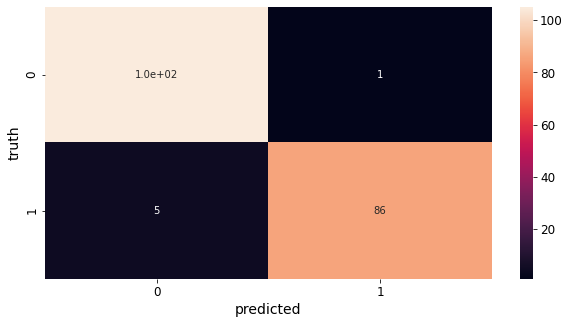

In [30]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report
# Some score
X_test_sam =scal.fit_transform(X_test_sample)

y_pred=resul_svm_Unders.predict(X_test_sam)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_sample, y_pred)

print(f"Classification Report :- \n {classification_report(y_test_sample, y_pred)}")
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth') 

> * La methode de Undersample donne un tres bon resulats sur les données les données test.
> * Nous avons un recall de $0.96$. Seul 5 fraudeur n'ont pas pu être predire par le modèle.
> * Nous avons egalement une très bonnes bonnes precision du modèle. Sur les $87$ individus predire comme fraudeurs, seul un (01) individu n'étaient pas un fraudeurs.

#### Le UnderSample s'adapte tres bien au Modèle SVM

># 4.5- Resumé pour le model SVM

>> * Le UnderSample s'adapte tres bien au Modèle SVM avec une $precision=0.98$ et un $recall=0.96$. Elle presente les meilleurs performance sur les données test.
>> * Le modèle sur les données Normalisées présente également de meilleur résulat pour la prédiction de fraude avec le SVM
>>  Notre modèle sur les données Normalisées présente un Meilleur resultat avec un $Recall=0.79, Precision=0.80$
>> * Les données rechantillonnées (OverSample) augmentent la détection de fraude sur les données test; mais augmente l'eureur sur la prédiction


 # 6- Le Modele RandomForest <a class="anchor" id="rf"></a>

>  Nous avons voulu voir la performance du modéle SVM: 
> * sur les données Standarisées
> * Sur les Données Normalisées
> * Sur les données sur-échantillonnées (Over-sample)

### 6.1- Standarisation de nos donnees

> Nous appliqu'ons ici le modele le modele Random Forest sur nos donnees Standarisees

In [31]:

from sklearn.model_selection import StratifiedKFold


In [ ]:
#outil grille de recherche
from sklearn.model_selection import GridSearchCV
#paramètres à tester
parametres = [{"n_estimators":[500]}]

rf = RandomForestClassifier()

cv = StratifiedKFold(n_splits=6,shuffle=True, random_state=1)

grid_rf = GridSearchCV(estimator=rf,cv=cv,param_grid=parametres,scoring="recall")

#lancer l'exploration
resul_rf = grid_rf.fit(X_train,y_train)


In [48]:
#meilleur score
print(resul_rf.best_score_)

#meilleur paramétrage
print(resul_rf.best_params_)

0.7766899766899767
{'n_estimators': 500}


In [33]:
# Some score
y_pred=resul_rf.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
rec_score=recall_score(y_test,y_pred)
clas_report=classification_report(y_test,y_pred)
preci_score=precision_score(y_test,y_pred)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


accuracy_score=0.9995259997893332 recall_score=0.7653061224489796 precision_score=0.9493670886075949 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



> * Notre Score (Recall) sur l'ensemble d'entrainement etait de 0.77

> * Cependant le recall sur l'ensemble test donne un score de 0.77. Ce la signifie que notre predire 77% des éléments de la classe 1 ont pu etre predire apartis de notre ensemble de test.
> * il n y a pas de sur entrainement dans le modele
> * On a egalement une precision de $0.95$, c'est a dire sur l'ensemble des éléments predire comme appartenant à la classe $1$, $95\%$ se sont avérés vrais. Ce qui est évidement satifaissant.

## 6.2- Données sur-échantillonées

In [34]:
resul_rf_res = grid_rf.fit(X_train_res,y_train_res)


In [35]:
#meilleur score
print(resul_rf_res.best_score_)

#meilleur paramétrage
print(resul_rf_res.best_params_)

1.0
{'n_estimators': 500}


In [36]:
# Some score
y_pred=resul_rf_res.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
rec_score=recall_score(y_test,y_pred)
clas_report=classification_report(y_test,y_pred)
preci_score=precision_score(y_test,y_pred)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


accuracy_score=0.9995611109160493 recall_score=0.8673469387755102 precision_score=0.8762886597938144 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.87      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



> * Notre Score (Recall) sur l'ensemble d'entrainement etait de 1

> * Cependant le recall sur l'ensemble test donne un score de 0.87. 
> * On a egalement une precision de $0.88$, c'est a dire sur l'ensemble des individus predits comme appartenant à la classe $1$, $88\%$ se sont avérés vrais.
> * le model s'adapte bien aux données suréchantillonées avec $recall=0.87$ , $precision=0.88$


## 6.3- Données Normalisées

In [45]:
resul_rf_N = grid_rf.fit(X_train_N,y_train_N)

In [60]:


#meilleur score
print(resul_rf_N.best_score_)

#meilleur paramétrage
print(resul_rf_N.best_params_)

0.7766899766899767
{'n_estimators': 500}


In [71]:
# Some score
y_pred_N=resul_rf_N.predict(X_test_N)
acc_score=accuracy_score(y_test_N,y_pred_N)
rec_score=recall_score(y_test_N,y_pred_N)
clas_report=classification_report(y_test_N,y_pred_N)
preci_score=precision_score(y_test_N,y_pred_N)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


accuracy_score=0.9995435553526912 recall_score=0.7755102040816326 precision_score=0.95 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



> * Notre Score (Recall) sur l'ensemble d'entrainement etait de 0.77

> * Cependant le recall sur l'ensemble test donne un score de 0.78. Ce la signifie que  78% des elements de la classe 1 ont pu etre predit à partir de notre ensemble de test.
> * il n y a pas de surentrainement dans le modele
> * On a également une précision de $0.95$, c'est a dire sur l'ensemble des éléments predits comme appartenant à la classe $1$, $95\%$ se sont averés vrais. Ce qui est évidemment satifaissant.

## 6.4 - Undersampling

Accuracy of model on test dataset :- 0.9543147208121827
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       106
           1       0.96      0.95      0.95        91

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



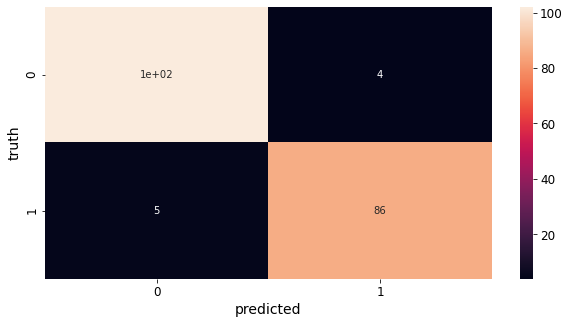

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def randomforest(X_train, y_train, X_test, y_test):
 rf_classifier = RandomForestClassifier(n_estimators=500)
 rf_classifier.fit(X_train, y_train.values.ravel())
 acc_score = rf_classifier.score(X_test, y_test)
 
 print(f'Accuracy of model on test dataset :- {acc_score}')
 
 y_pred = rf_classifier.predict(X_test)
 from sklearn.metrics import confusion_matrix
 cm=confusion_matrix(y_test, y_pred)

 print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")
 %matplotlib inline
 import seaborn as sn
 plt.figure(figsize=(10,5))
 sn.heatmap(cm,annot=True)
 plt.xlabel('predicted')
 plt.ylabel('truth') 
randomforest(X_train_sample, y_train_sample, X_test_sample, y_test_sample)



> * Nos donnees test contenait $91$ individus de la classe 1, et le modele a pu prédire avec exactitude $86$ d'entre eux  soit un recall de $0.95$ = $\frac{86}{5+86}$
> * Parmis les individus que le modele a predire comme des individus de la classe 1, quatre ($4$) n'était pas de la classe 1. Soit $96\%$ sont vraiment des fraudeurs. 
> * On a  donc une très bonne Precision. Ce Modele prédire mieu les fraudeurs

> * Dans cette partie nous pouvons voir que le Undersampling produit une très bonne performance sur les données test
> * Le $Recall$ et la $précision$ sont largement surperieurs aux autres techniques
> * On a une très bonne précision des fraudeurs sur les données test
> * $95\%$ des valeurs  de la classe 1 présentes dans les données test ont été predit correctement

## 6.5 - Resumé pour le RandomForest

> ## Le methode de UnderSample presente les meilleurs performances avec le random forest
> * Données Standarisées : Le recall etait de 0.77 sur les données test
> * Données Normalisées entre 0 et 1 : Le recall etait de 0.78 sur les données test
> * Données OverSample: Le recall etait de 0.87 sur les données test
> * Données undersample: Le recall etait de 0.95 sur les données test
###  Il est evident que le Undersample permette de mieux predire les cas de fraude dans nos données test avec le modèle de RandomForest. 

# 7- Réseau de neurones artificiels <a class="anchor" id="ANN"></a>

In [33]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import keras

In [34]:
# Evaluate
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 150, activation = 'relu', input_dim = 30))
    classifier.add(Dense(units = 100, activation = 'relu'))
    classifier.add(Dense(units = 1,  activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=[keras.metrics.Recall()])
    return classifier

In [35]:
X_train.shape # metrics=[keras.metrics.Recall(),'accuracy','Precision']

(227845, 30)

# Recherche des meilleurs parametres pour le modele de reseau de neurone

In [43]:
# 
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10],
              'epochs': [100],
              'optimizer': ['adam']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 2)
grid_search = grid_search.fit(X_train, y_train)


Epoch 1/100
11393/11393 [==============================] - 11s 932us/step - loss: 0.0059 - recall_12: 0.7513
Epoch 2/100
11393/11393 [==============================] - 11s 935us/step - loss: 0.0035 - recall_12: 0.7565
Epoch 3/100
11393/11393 [==============================] - 14s 1ms/step - loss: 0.0036 - recall_12: 0.7772
Epoch 4/100
11393/11393 [==============================] - 14s 1ms/step - loss: 0.0033 - recall_12: 0.7565
Epoch 5/100
11393/11393 [==============================] - 14s 1ms/step - loss: 0.0030 - recall_12: 0.7720
Epoch 6/100
11393/11393 [==============================] - 14s 1ms/step - loss: 0.0030 - recall_12: 0.7876
Epoch 7/100
11393/11393 [==============================] - 14s 1ms/step - loss: 0.0030 - recall_12: 0.7979
Epoch 8/100
11393/11393 [==============================] - 14s 1ms/step - loss: 0.0024 - recall_12: 0.7927
Epoch 9/100
11393/11393 [==============================] - 15s 1ms/step - loss: 0.0022 - recall_12: 0.8135
Epoch 10/100
11393/11393 [=======

11393/11393 [==============================] - 18s 2ms/step - loss: 6.0583e-04 - recall_13: 0.9495
Epoch 50/100
11393/11393 [==============================] - 18s 2ms/step - loss: 7.2986e-04 - recall_13: 0.9444
Epoch 51/100
11393/11393 [==============================] - 16s 1ms/step - loss: 0.0014 - recall_13: 0.9192
Epoch 52/100
11393/11393 [==============================] - 16s 1ms/step - loss: 0.0010 - recall_13: 0.9444
Epoch 53/100
11393/11393 [==============================] - 15s 1ms/step - loss: 7.5737e-04 - recall_13: 0.9495
Epoch 54/100
11393/11393 [==============================] - 15s 1ms/step - loss: 0.0012 - recall_13: 0.9343
Epoch 55/100
11393/11393 [==============================] - 16s 1ms/step - loss: 0.0016 - recall_13: 0.9545
Epoch 56/100
11393/11393 [==============================] - 16s 1ms/step - loss: 3.7956e-04 - recall_13: 0.9646
Epoch 57/100
11393/11393 [==============================] - 15s 1ms/step - loss: 9.8216e-04 - recall_13: 0.9495
Epoch 58/100
11393/11

22785/22785 [==============================] - 28s 1ms/step - loss: 0.0014 - recall_14: 0.9386
Epoch 99/100
22785/22785 [==============================] - 28s 1ms/step - loss: 0.0016 - recall_14: 0.9284
Epoch 100/100
22785/22785 [==============================] - 28s 1ms/step - loss: 8.9497e-04 - recall_14: 0.9309


In [44]:
grid_search.best_score_

0.7705029570314544

In [45]:
y_pred=grid_search.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

Text(66.0, 0.5, 'truth')

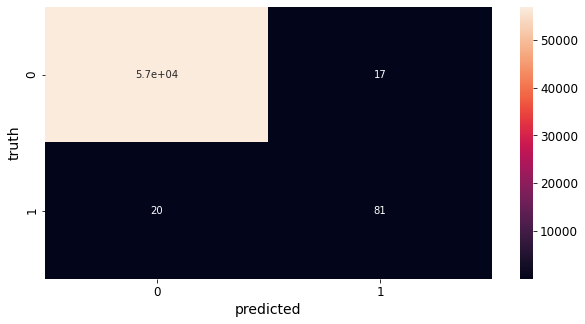

In [49]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

> * Nos donnees test contenait $101$ individus de la classe 1, et le modele a pu predire avec exactitude $81$ d'entre eux  soit un recall de $0.80$ = $\frac{81}{20+81}$
> * Parmis les individus que le modele a predire comme des individus de la classe 1, $83\%$ sont vraiment des fraudeurs

In [14]:
81/(20+81)

0.801980198019802

In [48]:
# Some score
y_pred=grid_search.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
rec_score=recall_score(y_test,y_pred)
clas_report=classification_report(y_test,y_pred)
preci_score=precision_score(y_test,y_pred)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


accuracy_score=0.9993504441557529 recall_score=0.801980198019802 precision_score=0.826530612244898 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.83      0.80      0.81       101

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



> * Le Modèle  de neurone construit a une precision de $0.83$. c'est a dire sur l'ensemble des éléments predits comme appartenant à la classe $1$, $83\%$ ce sont avérés vrais. Ce qui est évidemment satifaissant.
> * De même, notre modèle a pu predire $80\%$ des individus de la classe 1 dans les données test. (Recall)
> * Il n'ya pas de surapprentissage sur les données

## 7.2 - UnderSample

In [36]:
# 
# Evaluate
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 150, activation = 'relu', input_dim = 30))
    classifier.add(Dense(units = 100, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=[keras.metrics.Recall()])
    return classifier



from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10],
              'epochs': [100],
              'optimizer': ['adam']}
grid_search_N = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)


from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
X_train_sam_ =scal.fit_transform(X_train_sample)

grid_search_N = grid_search_N.fit(X_train_sam_, y_train_sample)


Epoch 1/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3146 - recall: 0.8397
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1902 - recall: 0.8942
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1538 - recall: 0.9135
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1312 - recall: 0.9231
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1158 - recall: 0.9231
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1093 - recall: 0.9391
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0968 - recall: 0.9423
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0968 - recall: 0.9519
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0790 - recall: 0.9519
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0757 - recall: 0.9583
Epoch 11/100
63/63 [=========

63/63 [==============================] - 0s 1ms/step - loss: 8.1269e-05 - recall: 1.0000
Epoch 84/100
63/63 [==============================] - 0s 1ms/step - loss: 8.5440e-05 - recall: 1.0000
Epoch 85/100
63/63 [==============================] - 0s 1ms/step - loss: 7.6164e-05 - recall: 1.0000
Epoch 86/100
63/63 [==============================] - 0s 1ms/step - loss: 7.3191e-05 - recall: 1.0000
Epoch 87/100
63/63 [==============================] - 0s 1ms/step - loss: 6.7060e-05 - recall: 1.0000
Epoch 88/100
63/63 [==============================] - 0s 1ms/step - loss: 6.8954e-05 - recall: 1.0000
Epoch 89/100
63/63 [==============================] - 0s 1ms/step - loss: 6.5874e-05 - recall: 1.0000
Epoch 90/100
63/63 [==============================] - 0s 1ms/step - loss: 5.7527e-05 - recall: 1.0000
Epoch 91/100
63/63 [==============================] - 0s 1ms/step - loss: 5.7321e-05 - recall: 1.0000
Epoch 92/100
63/63 [==============================] - 0s 1ms/step - loss: 5.6963e-05 - recall: 

63/63 [==============================] - 0s 1ms/step - loss: 4.8320e-04 - recall_1: 1.0000
Epoch 59/100
63/63 [==============================] - 0s 1ms/step - loss: 4.5636e-04 - recall_1: 1.0000
Epoch 60/100
63/63 [==============================] - 0s 1ms/step - loss: 3.3738e-04 - recall_1: 1.0000
Epoch 61/100
63/63 [==============================] - 0s 1ms/step - loss: 3.0895e-04 - recall_1: 1.0000
Epoch 62/100
63/63 [==============================] - 0s 1ms/step - loss: 2.9049e-04 - recall_1: 1.0000
Epoch 63/100
63/63 [==============================] - 0s 1ms/step - loss: 2.8956e-04 - recall_1: 1.0000
Epoch 64/100
63/63 [==============================] - 0s 1ms/step - loss: 2.9788e-04 - recall_1: 1.0000
Epoch 65/100
63/63 [==============================] - 0s 1ms/step - loss: 2.3482e-04 - recall_1: 1.0000
Epoch 66/100
63/63 [==============================] - 0s 1ms/step - loss: 2.9724e-04 - recall_1: 1.0000
Epoch 67/100
63/63 [==============================] - 0s 1ms/step - loss: 2.1

Epoch 16/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0399 - recall_3: 0.9687
Epoch 17/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0385 - recall_3: 0.9843
Epoch 18/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0307 - recall_3: 0.9781
Epoch 19/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0341 - recall_3: 0.9812
Epoch 20/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0284 - recall_3: 0.9843
Epoch 21/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0257 - recall_3: 0.9843
Epoch 22/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0208 - recall_3: 1.0000
Epoch 23/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0246 - recall_3: 0.9843
Epoch 24/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0147 - recall_3: 0.9937
Epoch 25/100
63/63 [==============================] - 0s 1ms/step - loss: 0.0146 - recall_3: 1.0000


63/63 [==============================] - 0s 1ms/step - loss: 5.8676e-05 - recall_3: 1.0000
Epoch 97/100
63/63 [==============================] - 0s 1ms/step - loss: 6.7239e-05 - recall_3: 1.0000
Epoch 98/100
63/63 [==============================] - 0s 1ms/step - loss: 6.1414e-05 - recall_3: 1.0000
Epoch 99/100
63/63 [==============================] - 0s 1ms/step - loss: 5.6527e-05 - recall_3: 1.0000
Epoch 100/100
63/63 [==============================] - 0s 1ms/step - loss: 5.0415e-05 - recall_3: 1.0000
Epoch 1/100
63/63 [==============================] - 0s 925us/step - loss: 0.3402 - recall_4: 0.8426
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.2057 - recall_4: 0.8827
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1738 - recall_4: 0.9043
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1630 - recall_4: 0.9012
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1398 - recall_4: 0.

79/79 [==============================] - 0s 1ms/step - loss: 3.6504e-04 - recall_5: 1.0000
Epoch 57/100
79/79 [==============================] - 0s 1ms/step - loss: 3.1983e-04 - recall_5: 1.0000
Epoch 58/100
79/79 [==============================] - 0s 1ms/step - loss: 4.7829e-04 - recall_5: 1.0000
Epoch 59/100
79/79 [==============================] - 0s 2ms/step - loss: 5.3020e-04 - recall_5: 1.0000
Epoch 60/100
79/79 [==============================] - 0s 1ms/step - loss: 3.1639e-04 - recall_5: 1.0000
Epoch 61/100
79/79 [==============================] - 0s 1ms/step - loss: 2.5723e-04 - recall_5: 1.0000
Epoch 62/100
79/79 [==============================] - 0s 1ms/step - loss: 2.2843e-04 - recall_5: 1.0000
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 2.2913e-04 - recall_5: 1.0000
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 2.1148e-04 - recall_5: 1.0000
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 2.0

In [37]:
grid_search_N.best_score_

0.9080301258509701

In [38]:
X_test_sam =scal.fit_transform(X_test_sample)

y_pred_N=grid_search_N.predict(X_test_sam)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_sample, y_pred_N)

accuracy_score=0.9644670050761421 recall_score=0.9560439560439561 precision_score=0.9666666666666667 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       106
           1       0.97      0.96      0.96        91

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



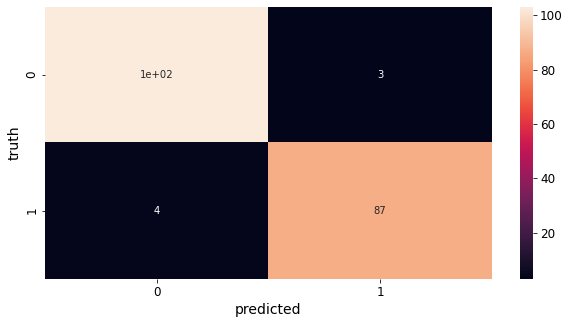

In [39]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# Some score
y_pred_N=grid_search_N.predict(X_test_sam)
acc_score=accuracy_score(y_test_sample,y_pred_N)
rec_score=recall_score(y_test_sample,y_pred_N)
clas_report=classification_report(y_test_sample,y_pred_N)
preci_score=precision_score(y_test_sample,y_pred_N)
print("accuracy_score={} recall_score={} precision_score={} \n{}".format(acc_score,rec_score,preci_score,clas_report))


> * Nos donnees test contenait $91$ individus de la classe 1, et le modele a pu prédire avec exactitude $87$ d'entre eux  soit un recall de $0.96$ = $\frac{87}{4+87}$
> * Parmis les individus que le modele a predire comme des individus de la classe 1, seulement trois (03)  n'étaient pas de la classe 1. Soit $97\%$ sont vraiment des fraudeurs. 
> * On a une très bonne Precision.

> ### La technique de UnderSample produit de tres bon résultats sur les reseau de Neuron également

## Conclusion

> * Nous avons vu que dans ce modèle de détection de fraude, la meilleure precision pourait être le recall et non l'accuracy
> * Le Oversample augmente la précision sur la détection de fraude cependant augnente le biais dans la prédiction
> * Le undersample s'est avéré tres performant avec les trois modèle. Elle a présenté les meilleur performant sur les données test sur les Trois modèles étudiés.
